# 0. Import necessary modules

In [1]:
import pandas as pd
import numpy as np
import re
from shark_functions import *
%matplotlib inline

# 2. Read csv and columns

In [2]:
df = pd.read_csv("../attacks.csv", encoding = "latin-1")
print(df.shape)
df.head()

(25723, 24)


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [3]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

# 3. General cleaning

In [4]:
#we lower capital letters, eliminate final spaces and dots
#this helps to call columns
clean_cols(df)

Index(['case number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal (y/n)', 'time',
       'species', 'investigator or source', 'pdf', 'href formula', 'href',
       'case number 1', 'case number 2', 'original order', 'unnamed: 22',
       'unnamed: 23'],
      dtype='object')

In [5]:
#drop duplicates
df = df.drop_duplicates(subset=list(df.columns))
print(df.shape)
df.head()

(6312, 24)


,case number,date,year,type,country,area,location,activity,name,sex,...,species,investigator or source,pdf,href formula,href,case number 1,case number 2,original order,unnamed: 22,unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [6]:
df.isnull().sum()

case number                  2
date                        10
year                        12
type                        14
country                     60
area                       465
location                   550
activity                   554
name                       220
sex                        575
age                       2841
injury                      38
fatal (y/n)                549
time                      3364
species                   2848
investigator or source      27
pdf                         10
href formula                11
href                        10
case number 1               10
case number 2               10
original order               3
unnamed: 22               6311
unnamed: 23               6310
dtype: int64

In [7]:
#we wondered if this 3 not null values could be important, so we checked before delenting them
df.loc[df["unnamed: 22"].notna() | df["unnamed: 23"].notna()]

,case number,date,year,type,country,area,location,activity,name,sex,...,species,investigator or source,pdf,href formula,href,case number 1,case number 2,original order,unnamed: 22,unnamed: 23
1478,2006.05.27,27-May-2006,2006.0,Unprovoked,USA,Hawaii,"North Shore, O'ahu",Surfing,Bret Desmond,M,...,NaN,R. Collier,2006.05.27-Desmond.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.05.27,2006.05.27,4825.0,stopped here,NaN
4415,1952.03.30,30-Mar-1952,1952.0,Unprovoked,NETHERLANDS ANTILLES,Curacao,NaN,Went to aid of child being menaced by the shark,A.J. Eggink,M,...,"Bull shark, 2.7 m [9'] was captured & dragged ...","J. Randall, p.352 in Sharks & Survival; H.D. B...",1952.03.30-Eggink.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.03.30,1952.03.30,1888.0,NaN,Teramo
5840,1878.09.14.R,Reported 14-Sep-1878,1878.0,Provoked,USA,Connecticut,"Branford, New Haven County",Fishing,Captain Pattison,M,...,NaN,"St. Joseph Herald, 9/14/1878",1878.09.14.R-Pattison.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1878.09.14.R,1878.09.14.R,463.0,NaN,change filename


In [8]:
#as the 2 previous columns had allmost all values null and we checked the 3 doubts we had, we eliminate them
#also, we delete columns which will not help us to answer the questions we formulated
df = df.drop(axis = 1, columns = ['case number', 'year', 'name','investigator or source', 'pdf', 'href formula', 'href',
       'case number 1', 'case number 2', 'original order', 'unnamed: 22', 'area', 'location', 'injury', 'time',
       'unnamed: 23'])
print(df.shape)
df

(6312, 8)


,date,type,country,activity,sex,age,fatal (y/n),species
0,25-Jun-2018,Boating,USA,Paddling,F,57,N,White shark
1,18-Jun-2018,Unprovoked,USA,Standing,F,11,N,NaN
2,09-Jun-2018,Invalid,USA,Surfing,M,48,N,NaN
3,08-Jun-2018,Unprovoked,AUSTRALIA,Surfing,M,NaN,N,2 m shark
4,04-Jun-2018,Provoked,MEXICO,Free diving,M,NaN,N,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...
6307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#we get rid of null rows
df = df.dropna(how="all")
df

,date,type,country,activity,sex,age,fatal (y/n),species
0,25-Jun-2018,Boating,USA,Paddling,F,57,N,White shark
1,18-Jun-2018,Unprovoked,USA,Standing,F,11,N,NaN
2,09-Jun-2018,Invalid,USA,Surfing,M,48,N,NaN
3,08-Jun-2018,Unprovoked,AUSTRALIA,Surfing,M,NaN,N,2 m shark
4,04-Jun-2018,Provoked,MEXICO,Free diving,M,NaN,N,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...
6297,Before 1903,Unprovoked,AUSTRALIA,Diving,M,NaN,Y,NaN
6298,Before 1903,Unprovoked,AUSTRALIA,Pearl diving,M,NaN,Y,NaN
6299,1900-1905,Unprovoked,USA,Swimming,M,NaN,Y,NaN
6300,1883-1889,Unprovoked,PANAMA,NaN,M,NaN,Y,NaN


# Creating column month

In [10]:
df["month"] = find_month(df.date)
df["month"].value_counts()

/home/diego/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Jul       621
Aug       555
Sep       520
Jan       493
Jun       475
Apr       420
Oct       417
Dec       415
Mar       379
Nov       377
May       358
Feb       356
MarMar      2
SepSep      1
AugAug      1
JanJan      1
NovNov      1
Name: month, dtype: int64

In [11]:
df.dropna(subset=['month'], inplace=True)

for m in df["month"]:
    if len(m) > 3:
        df["month"].replace(m,m[:3], inplace=True)
        
df["month"].value_counts()

/home/diego/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/diego/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Jul    621
Aug    556
Sep    521
Jan    494
Jun    475
Apr    420
Oct    417
Dec    415
Mar    381
Nov    378
May    358
Feb    356
Name: month, dtype: int64

# Creating column year

In [12]:
#we create year from date to add the 2 null values of year
df["year"] = find_year(df.date)

/home/diego/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
df["year"].value_counts()

2015    141
2017    135
2016    129
2011    125
2014    123
       ... 
1801      1
1742      1
1751      1
1788      1
1807      1
Name: year, Length: 223, dtype: int64

In [14]:
df.dropna(subset=['year'], inplace=True)

for m in df["year"]:
    if len(m) > 4:
        df["year"].replace(m,m[:4], inplace=True)
        
df["year"].value_counts()

/home/diego/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2015    141
2017    135
2016    129
2011    125
2014    123
       ... 
1784      1
1787      1
1785      1
1841      1
1753      1
Name: year, Length: 214, dtype: int64

In [15]:
df.year = [int(y) for y in df.year]

/home/diego/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


# Creating column decades

In [16]:
ir = pd.interval_range(start=1500, freq=10, end=2020, closed='left')
df["decades"] = pd.cut(df["year"], bins = ir)
df["decades"].value_counts()

/home/diego/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[2010, 2020)    1039
[2000, 2010)     982
[1960, 1970)     528
[1990, 2000)     518
[1980, 1990)     381
[1950, 1960)     340
[1970, 1980)     281
[1930, 1940)     244
[1940, 1950)     205
[1920, 1930)     172
[1910, 1920)     130
[1900, 1910)     125
[1890, 1900)     120
[1880, 1890)      96
[1870, 1880)      70
[1860, 1870)      46
[1840, 1850)      32
[1850, 1860)      29
[1830, 1840)      15
[1820, 1830)       8
[1810, 1820)       8
[1780, 1790)       7
[1800, 1810)       6
[1750, 1760)       2
[1770, 1780)       1
[1790, 1800)       1
[1740, 1750)       1
[1730, 1740)       1
[1700, 1710)       1
[1580, 1590)       1
[1610, 1620)       0
[1510, 1520)       0
[1520, 1530)       0
[1530, 1540)       0
[1540, 1550)       0
[1550, 1560)       0
[1560, 1570)       0
[1570, 1580)       0
[1590, 1600)       0
[1600, 1610)       0
[1630, 1640)       0
[1620, 1630)       0
[1760, 1770)       0
[1640, 1650)       0
[1650, 1660)       0
[1660, 1670)       0
[1670, 1680)       0
[1680, 1690) 

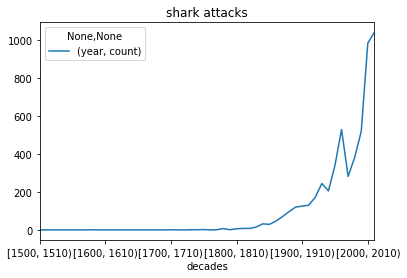

In [17]:
#we observe number of attacks by decade
decs = df.groupby(["decades"]).agg({"year":["count"]})
decs.plot(title = "shark attacks")

In [18]:
#getting rid of non necessary column
df = df.drop(columns=["date"])
df.isnull().sum()

type              4
country          31
activity        383
sex             431
age            2105
fatal (y/n)     460
species        2288
month             0
year              0
decades           0
dtype: int64

# Cleaning species

In [19]:
#1st step to clean species
df.species = df.species.fillna("unknown")
df.species = df.species.str.lower()
df["species"] = find_sharks(df.species)

white shark
unknown
unknown
m shark
tiger shark
unknown
tiger shark
lemon shark
bull shark
unknown
reef shark
unknown
unknown
unknown
unknown
unknown
unknown
tiger shark
unknown
unknown
m shark
white shark
tiger shark
white shark
 shark
bull shark
unknown
unknown
unknown
tiger shark
unknown
m shark
bull shark
white shark
tiger shark
wobbegong shark
m shark
m shark
blacktip shark
white shark
unknown
bull shark
unknown
a shark
galapagos shark
2m shark
bull shark
bull shark
reef shark
white shark
small shark
wobbegong shark
tiger shark
unknown
nurse shark
nurse shark
tiger shark
tiger shark
blue shark
white shark
unknown
unknown
m shark
tiger shark
cookiecutter shark
wobbegong shark
unknown
unknown
unknown
unknown
white shark
m shark
spinner shark
tiger shark
 shark
unknown
 shark
white shark
unknown
 shark
unknown
unknown
unknown
unknown
unknown
 shark
unknown
white shark
unknown
unknown
unknown
nurse shark
unknown
unknown
white shark
unknown
unknown
unknown
white shark
 shark
blacktip s

unknown
unknown
unknown
unknown
unknown
unknown
spinner shark
white shark
unknown
 shark
unknown
white shark
 shark
unknown
unknown
white shark
white shark
 shark
 shark
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
kg shark
white shark
blacktip shark
unknown
unknown
unknown
tiger shark
 shark
white shark
white shark
unknown
white shark
white shark
unknown
unknown
bull shark
bull shark
mako shark
unknown
unknown
 shark
unknown
unknown
unknown
unknown
 shark
unknown
unknown
white shark
white shark
unknown
lemon sharkbull shark
unknown
white shark
white shark
white shark
unknown
 shark
unknown
unknown
unknown
tiger shark
unknown
white shark
unknown
unknown
unknown
 shark
 shark
 shark
blue shark
 shark
mako shark
unknown
unknown
whale shark
white shark
white shark
white shark
 shark
unknown
white shark
 shark
whaler shark
 shark
white shark
nurse shark
 shark
dusky shark
unknown
 shark
unknown
unknown
unknown
white shark
 shark
white shark
unknown
unknown
white 

In [20]:
df.species.value_counts()

unknown                       2767
 shark                         639
white shark                    570
tiger shark                    225
bull shark                     147
                              ... 
of shark                         1
white sharksevengill shark       1
bull sharkthe shark              1
whitetip sharkwhite shark        1
 sharkkg shark                   1
Name: species, Length: 148, dtype: int64

In [21]:
#2nd and last step to find species
df.species = shark_species(df.species)
df.species.value_counts()

unknown        3712
white           601
tiger           251
bull            155
nurse            87
whaler           64
blacktip         60
reef             57
mako             47
spinner          42
raggedtooth      41
wobbegong        40
hammerhead       38
blue             35
lemon            31
zambesi          23
sand             20
gill             16
dusky            12
carpet            7
galapagos         6
basking           6
angel             6
dog               5
porbeagle         5
copper            5
silky             4
colored           4
thresher          4
zambezi           3
salmon            3
Name: species, dtype: int64

# Cleaning type

In [22]:
df.type.value_counts()

Unprovoked      3940
Provoked         500
Invalid          469
Sea Disaster     195
Boating          171
Boat             108
Questionable       2
Boatomg            1
Name: type, dtype: int64

In [23]:
df.type = clean_type(df)
df.type.value_counts()

unprovoked      3940
provoked         500
invalid          475
boat             280
sea disaster     195
Name: type, dtype: int64

# Cleaning country

In [24]:
df.country.value_counts()[df.country.value_counts()>5]

USA                     2051
AUSTRALIA               1227
SOUTH AFRICA             522
NEW ZEALAND              111
BRAZIL                   106
BAHAMAS                   91
PAPUA NEW GUINEA          77
MEXICO                    70
REUNION                   52
PHILIPPINES               51
ITALY                     49
FIJI                      44
SPAIN                     36
MOZAMBIQUE                35
NEW CALEDONIA             32
EGYPT                     32
CUBA                      31
CROATIA                   30
JAPAN                     29
INDIA                     27
SOLOMON ISLANDS           23
JAMAICA                   22
HONG KONG                 21
FRENCH POLYNESIA          20
INDONESIA                 18
ENGLAND                   18
PANAMA                    17
ATLANTIC OCEAN            15
GREECE                    14
BERMUDA                   13
COSTA RICA                13
VIETNAM                   12
PACIFIC OCEAN             12
TURKEY                    12
SOUTH ATLANTIC

In [25]:
df.country = clean_country(df)
df.country.value_counts()[df.country.value_counts()>5]

usa                   2051
australia             1227
south africa           522
new zealand            111
brazil                 106
no country             101
bahamas                 91
papua new guinea        77
mexico                  70
reunion                 52
philippines             51
italy                   49
fiji                    47
spain                   36
mozambique              35
united kingdom          32
new caledonia           32
egypt                   32
cuba                    31
croatia                 30
japan                   29
india                   27
solomon islands         23
jamaica                 22
hong kong               21
french polynesia        20
indonesia               18
panama                  17
greece                  14
bermuda                 13
costa rica              13
vietnam                 12
turkey                  12
canada                  10
tonga                   10
iran                     9
ecuador                  9
t

# Cleaning activity

In [26]:
df.activity.value_counts()[df.activity.value_counts()<4][df.activity.value_counts()>2]

Wreck of the schooner Pohoiki                                                                                                                   3
Escaping from Alacatraz                                                                                                                         3
Spearfishing                                                                                                                                    3
Spearfishing / free diving                                                                                                                      3
Spearfishing (free diving)                                                                                                                      3
Sculling                                                                                                                                        3
Fishing boat                                                                                                                

In [27]:
df.activity = clean_activity(df)
df.activity.value_counts()[df.activity.value_counts()>4]

surfing                1209
swimming                979
fishing                 928
diving                  437
unknown                 386
bathing                 140
wading                  137
standing                 90
snorkeling               82
boat                     70
body boarding            64
boogie boarding          43
floating                 40
kayaking                 33
paddle                   29
treading water           29
fell overboard           24
walking                  15
sea disaster             13
canoeing                 11
rowing                   11
sailing                   7
playing                   7
fell into the water       6
Name: activity, dtype: int64

# Cleaning sex

In [28]:
df.sex.value_counts()

M      4381
F       572
N         2
M         2
.         1
lli       1
Name: sex, dtype: int64

In [29]:
df.sex = clean_sex(df)
df.sex.value_counts()

M     4383
F      572
NA     435
Name: sex, dtype: int64

# Cleaning age

In [30]:
df.age.value_counts()[df.age.value_counts()>5]

17      147
18      141
19      138
20      133
16      130
       ... 
Teen      8
62        8
30s       7
68        6
5         6
Name: age, Length: 63, dtype: int64

In [31]:
df.dropna(subset=['age'], inplace=True)

for a in df.age:
    if len(str(a)) > 2:
        df.age.replace(a,a[:2],inplace=True)
        
df.age.value_counts()[df.age.value_counts()<5]

66    4
64    4
3     4
77    3
73    3
71    3
74    2
      2
75    2
9     2
mi    2
?     2
78    1
86    1
2½    1
87    1
(a    1
F     1
      1
7     1
yo    1
El    1
6½    1
"y    1
 4    1
81    1
ad    1
 2    1
A.    1
67    1
84    1
 3    1
82    1
72    1
1     1
      1
8     1
X     1
Bo    1
>5    1
MA    1
Name: age, dtype: int64

In [32]:
df.age = clean_age(df)

In [33]:
df.age.value_counts()

17    149
18    144
20    141
19    138
16    131
     ... 
84      1
81      1
1       1
67      1
86      1
Name: age, Length: 85, dtype: int64

# Cleaning fatal

In [34]:
df["fatal (y/n)"].value_counts()

N          2479
Y           583
UNKNOWN       7
 N            5
2017          1
M             1
Name: fatal (y/n), dtype: int64

In [36]:
df["fatal (y/n)"] = clean_fatal(df)
df["fatal (y/n)"].value_counts()

N          2485
Y           583
UNKNOWN     217
Name: fatal (y/n), dtype: int64

# 4. df clean

In [ ]:
#we check again the quantity of num values to decide which questions we can ask with high confidence level
df.isnull().sum()

In [ ]:
df

In [ ]:
meter todas las clean en func.py y exportar csv con datos limpios para analizar